# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
import datetime as dt
import json 
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fort st. john
Processing Record 2 of Set 1 | dudinka
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | huayucachi
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | west island
Processing Record 7 of Set 1 | castillos
Processing Record 8 of Set 1 | lubao
Processing Record 9 of Set 1 | el granada
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | lebedyan'
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | gadzhiyevo
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | uturoa
Processing Record 16 of Set 1 | aasiaat
Processing Record 17 of Set 1 | alice springs
Processing Record 18 of Set 1 | island harbour
Processing Record 19 of Set 1 | youhao
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | new norfolk
Processing Record 22 of Set 1 | petropavlovsk-kamchat

Processing Record 41 of Set 4 | flin flon
Processing Record 42 of Set 4 | grimstad
Processing Record 43 of Set 4 | beaufort west
Processing Record 44 of Set 4 | sola
Processing Record 45 of Set 4 | antofagasta
Processing Record 46 of Set 4 | codrington
Processing Record 47 of Set 4 | qamdo
Processing Record 48 of Set 4 | buka
Processing Record 49 of Set 4 | makueni boma
Processing Record 0 of Set 5 | haiku-pauwela
Processing Record 1 of Set 5 | manismata
Processing Record 2 of Set 5 | nangen
Processing Record 3 of Set 5 | tofol
Processing Record 4 of Set 5 | oranjemund
Processing Record 5 of Set 5 | setubal
Processing Record 6 of Set 5 | rumphi
Processing Record 7 of Set 5 | beira
Processing Record 8 of Set 5 | copiapo
Processing Record 9 of Set 5 | vorkuta
Processing Record 10 of Set 5 | smithers
Processing Record 11 of Set 5 | linxia chengguanzhen
Processing Record 12 of Set 5 | taiohae
City not found. Skipping...
Processing Record 13 of Set 5 | nizhnesortymskiy
Processing Record 14 

Processing Record 33 of Set 8 | coquimbo
Processing Record 34 of Set 8 | samana
Processing Record 35 of Set 8 | paramaribo
Processing Record 36 of Set 8 | kiunga
Processing Record 37 of Set 8 | lazaro cardenas
Processing Record 38 of Set 8 | rosignol
Processing Record 39 of Set 8 | mckinleyville
Processing Record 40 of Set 8 | burabay
Processing Record 41 of Set 8 | port glaud
City not found. Skipping...
Processing Record 42 of Set 8 | salina cruz
Processing Record 43 of Set 8 | caqueza
Processing Record 44 of Set 8 | auna
Processing Record 45 of Set 8 | hell-ville
Processing Record 46 of Set 8 | san luis de la loma
Processing Record 47 of Set 8 | happy valley-goose bay
Processing Record 48 of Set 8 | al mayadin
Processing Record 49 of Set 8 | queenstown
Processing Record 0 of Set 9 | hatillo
Processing Record 1 of Set 9 | 'ohonua
City not found. Skipping...
Processing Record 2 of Set 9 | new plymouth
Processing Record 3 of Set 9 | bella vista
Processing Record 4 of Set 9 | arroyo
Proc

Processing Record 26 of Set 12 | ambodifotatra
Processing Record 27 of Set 12 | rio preto da eva
Processing Record 28 of Set 12 | ikovka
Processing Record 29 of Set 12 | ayacucho
Processing Record 30 of Set 12 | san rafael
Processing Record 31 of Set 12 | arkhangel'sk
Processing Record 32 of Set 12 | bikenibeu village
Processing Record 33 of Set 12 | antsiranana
Processing Record 34 of Set 12 | andkhoy
Processing Record 35 of Set 12 | alaghsas
Processing Record 36 of Set 12 | gokarna
Processing Record 37 of Set 12 | karratha
Processing Record 38 of Set 12 | san jose del guaviare
Processing Record 39 of Set 12 | necaxa
Processing Record 40 of Set 12 | i-n-salah
Processing Record 41 of Set 12 | fannuj
City not found. Skipping...
Processing Record 42 of Set 12 | alotau
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fort st. john,56.2499,-120.8529,4.94,100,100,3.60,CA,1697312627
1,dudinka,69.4058,86.1778,1.49,93,100,6.71,RU,1697312439
2,waitangi,-43.9535,-176.5597,13.79,88,1,4.92,NZ,1697312449
3,huayucachi,-12.1333,-75.2333,17.49,48,100,4.48,PE,1697312801
4,port-aux-francais,-49.3500,70.2167,1.13,68,64,9.60,TF,1697312449


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fort st. john,56.2499,-120.8529,4.94,100,100,3.60,CA,1697312627
1,dudinka,69.4058,86.1778,1.49,93,100,6.71,RU,1697312439
2,waitangi,-43.9535,-176.5597,13.79,88,1,4.92,NZ,1697312449
3,huayucachi,-12.1333,-75.2333,17.49,48,100,4.48,PE,1697312801
4,port-aux-francais,-49.3500,70.2167,1.13,68,64,9.60,TF,1697312449


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

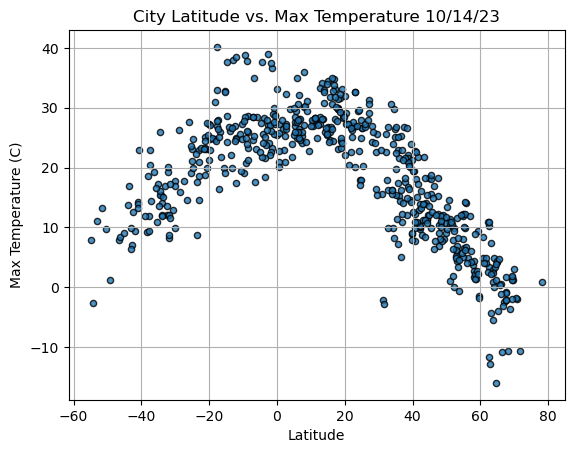

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="k", marker="o", s=20, alpha=.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

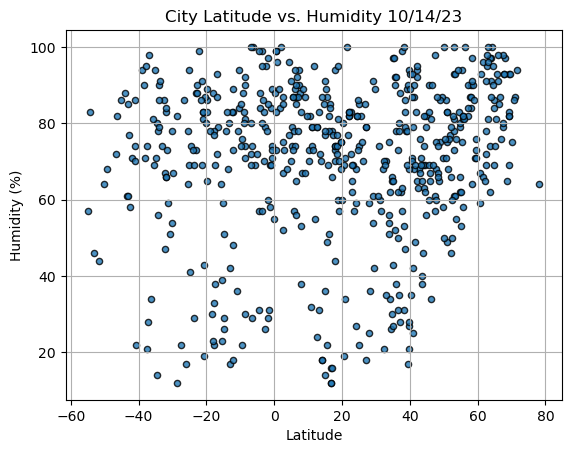

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="k", marker="o", s=20, alpha=.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

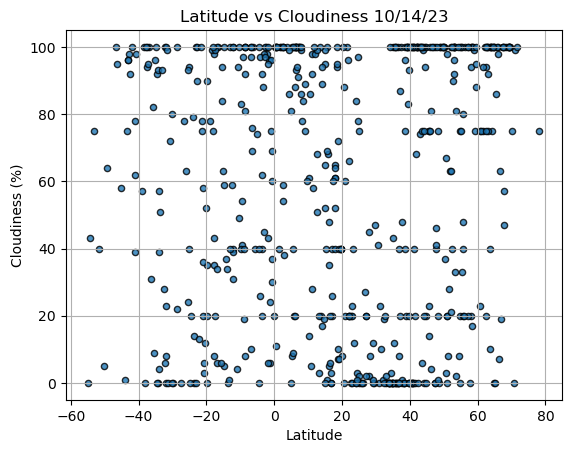

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="k", marker="o", s=20, alpha=.8)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title(f"Latitude vs Cloudiness " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

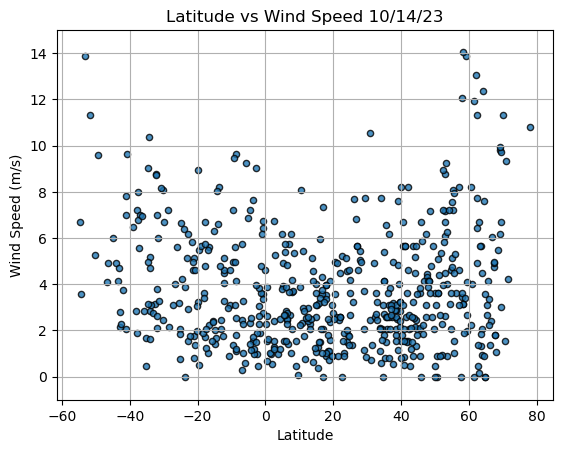

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="k", marker="o", s=20, alpha=.8)

# Incorporate the other graph properties
plt.title(f"Latitude vs Wind Speed " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.ylim(-1,15)
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fort st. john,56.2499,-120.8529,4.94,100,100,3.60,CA,1697312627
1,dudinka,69.4058,86.1778,1.49,93,100,6.71,RU,1697312439
7,lubao,14.9167,120.5500,26.84,91,65,1.06,PH,1697312802
8,el granada,37.5027,-122.4694,26.71,62,100,2.57,US,1697312513
10,lebedyan',53.0194,39.1664,11.59,61,92,7.19,RU,1697312802


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,waitangi,-43.9535,-176.5597,13.79,88,1,4.92,NZ,1697312449
3,huayucachi,-12.1333,-75.2333,17.49,48,100,4.48,PE,1697312801
4,port-aux-francais,-49.3500,70.2167,1.13,68,64,9.60,TF,1697312449
5,west island,-12.1568,96.8225,24.99,83,40,5.14,CC,1697312445
6,castillos,-34.1667,-53.8333,15.47,56,0,4.72,UY,1697312802


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8749617772579482


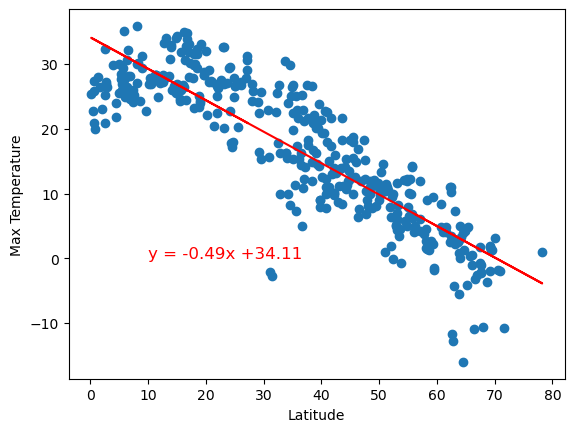

In [15]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(10,0),fontsize=12,color="red")

# Print r value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

The r-value is: 0.7556151964449179


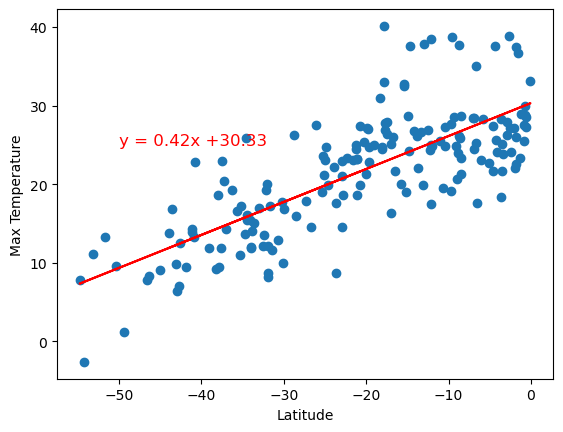

In [16]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values_southern = x_values * slope + intercept

line_eq_southern = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values_southern,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq_southern,(-50,25),fontsize=12,color="red")

# Print r value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()


**Discussion about the linear relationship: 
In the northern hemisphere, we see a negative linear relationship that tells us that as latitude increases, temperature decreases. The opposite occurs in the southern hemisphere. We see a positive relationship; as latitude increases, temperature also increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.15398811205092863


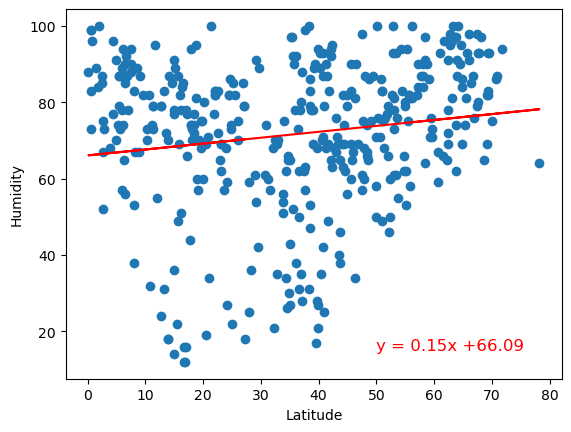

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(50,15),fontsize=12,color="red")

# Print r value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

The r-value is: 0.0349064019654735


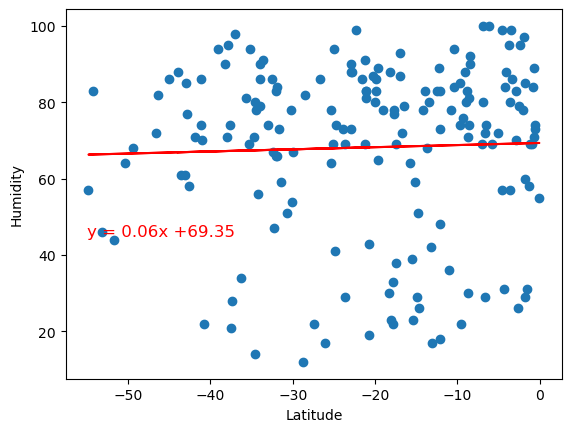

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-55,45),fontsize=12,color="red")

# Print r value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

**Discussion about the linear relationship:
In both southern and northern hemispheres, we see a positive linear relationships; as latitude increases, humidity also increases.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.11487346526171593


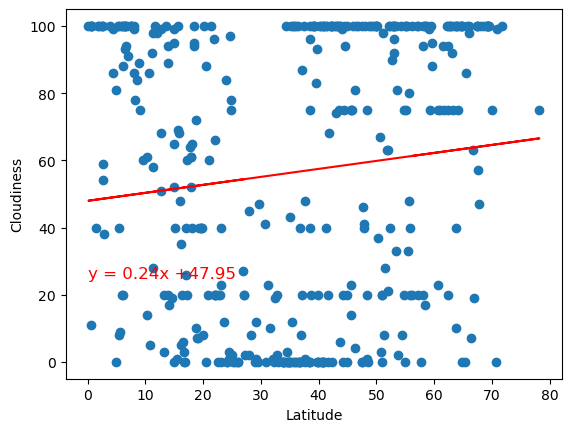

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(0,25),fontsize=12,color="red")

# Print r value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

The r-value is: 0.039048685356487624


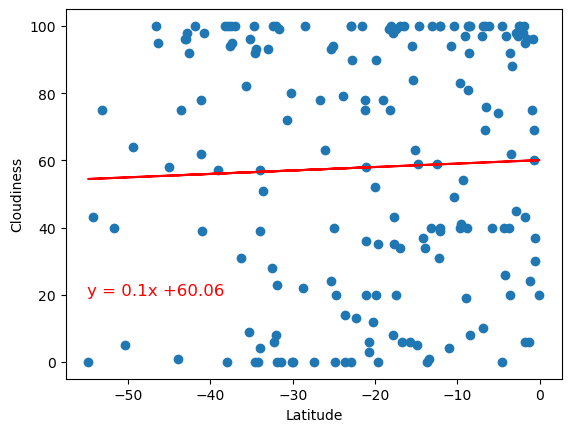

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-55,20),fontsize=12,color="red")

# Print r value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

**Discussion about the linear relationship:
In both southern and northern hemispheres, we see positive linear relationships; as as latitude increases, cloudiness also increases.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.2906749191287212


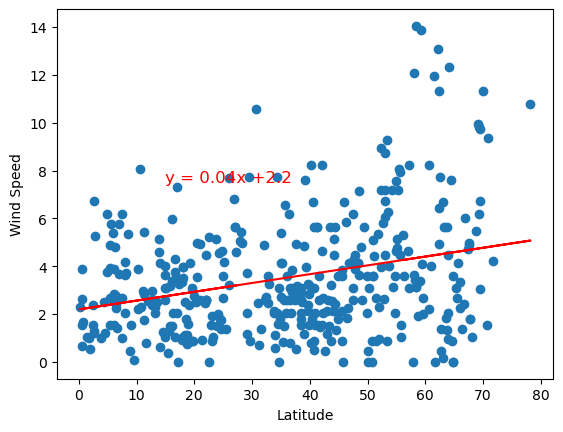

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(15,7.5),fontsize=12,color="red")

# Print r value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

The r-value is: -0.2927065959630142


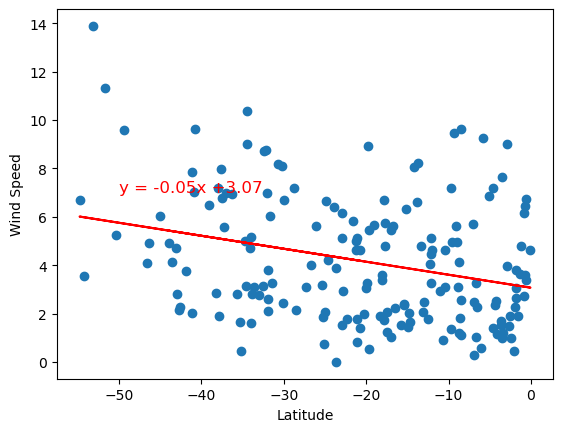

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-50,7),fontsize=12,color="red")

# Print r value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

**Discussion about the linear relationship: There is a negligible to almost no correlation between wind speed and latitude on Northern Hemisphere.
There is a weak negative correlation between wind speed and latitude on Southern Hemisphere.